# 001_상권분석 프로젝트

1. 일시: 2018년 12월 23일 ~ 2018년 12월 24일
2. 데이터 출처: https://www.data.go.kr/dataset/15012005/fileData.do

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd #엑셀처럼 다루기 위해
import numpy as np #수치 계산을 위해
from plotnine import * #그래프 시각화를 위해서
import re #정규표현식 사용을 위해
import folium # 지도 표현을 위해

store = pd.read_csv('/Users/ck/Desktop/CK_data_mining/상가업소/상가업소1.csv', encoding='CP949') 
#인코딩 방식은 여러개인데 CP949가 쓰인듯
store.shape #(488,016)개 데이터, (39)개 변수 존재

(488016, 39)

In [2]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488016 entries, 0 to 488015
Data columns (total 39 columns):
상가업소번호       488016 non-null int64
상호명          488015 non-null object
지점명          67136 non-null object
상권업종대분류코드    488016 non-null object
상권업종대분류명     488016 non-null object
상권업종중분류코드    488016 non-null object
상권업종중분류명     488016 non-null object
상권업종소분류코드    488016 non-null object
상권업종소분류명     488016 non-null object
표준산업분류코드     459732 non-null object
표준산업분류명      459732 non-null object
시도코드         488016 non-null int64
시도명          488016 non-null object
시군구코드        488016 non-null int64
시군구명         488016 non-null object
행정동코드        488016 non-null int64
행정동명         488016 non-null object
법정동코드        488016 non-null int64
법정동명         488016 non-null object
지번코드         488016 non-null int64
대지구분코드       488016 non-null int64
대지구분명        488016 non-null object
지번본번지        488016 non-null int64
지번부번지        404798 non-null float64
지번주소         488016 non-null obje

In [3]:
store.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774


In [4]:
store.isnull().sum() #습관적으로 데이터필드의 결측지 정도를 파악하자

상가업소번호            0
상호명               1
지점명          420880
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      28284
표준산업분류명       28284
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         83218
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        423669
건물관리번호            0
건물명          270920
도로명주소             0
구우편번호             0
신우편번호             9
동정보          443614
층정보          191858
호정보          415478
경도                0
위도                0
dtype: int64

--- 
아래 import는 시각화에서 한글 폰트 깨짐 현상때문에 추가해준 부분이다.  
참고사이트는 https://pinkwink.kr/990 이다

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

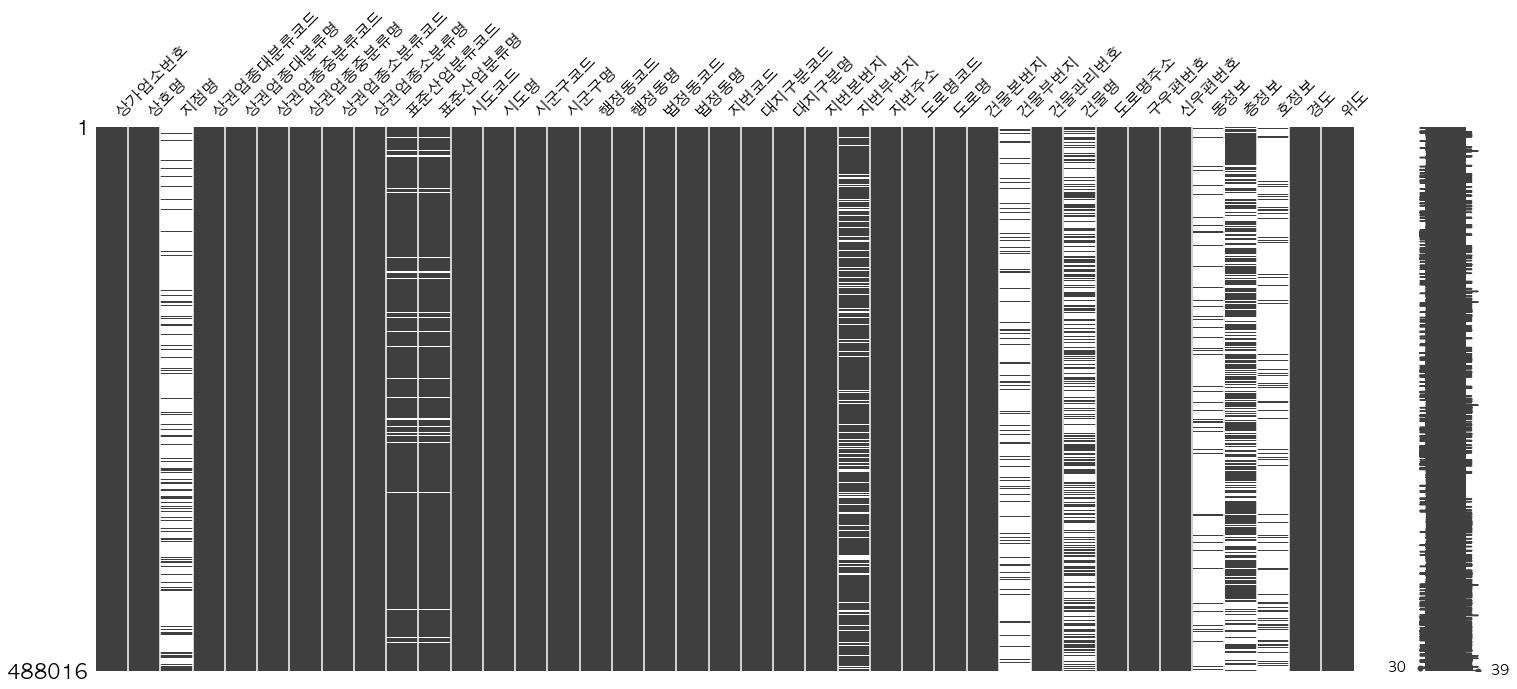

In [6]:
import missingno as msno
msno.matrix(store)

---
### 불필요한 칼럼 제거하기

In [7]:
store.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
store.drop(columns=['지점명','표준산업분류코드','표준산업분류명','지번부번지','건물부번지','건물명','동정보','층정보','호정보'],inplace=True)

In [9]:
store.shape #음...?왜 데이터셋 수가 줄어들지 않는거지...?

(488016, 30)

---
### 위경도 시각화

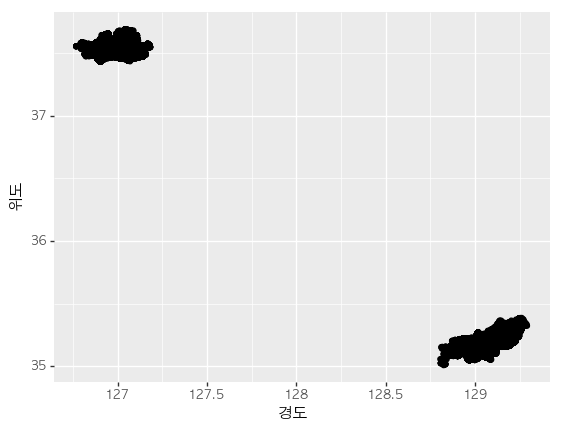

<ggplot: (278800981)>

In [10]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(store)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='AppleGothic'))
)

---
### 데이터 전처리

In [11]:
store.dtypes

상가업소번호         int64
상호명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물관리번호        object
도로명주소         object
구우편번호          int64
신우편번호        float64
경도           float64
위도           float64
dtype: object

In [12]:
store = store[store['상권업종대분류명']=='음식'] #음식점만 추출
store_seoul = store[store['시도명']=='서울특별시'] #서울시만 추출

In [13]:
store_seoul[['위도','경도']].describe() #위도경도상으로 결측치는 없어 보인다.

,위도,경도
count,113281.000000,113281.000000
mean,37.545749,126.993253
std,0.049061,0.081097
min,37.434081,126.797102
25%,37.505613,126.924135
50%,37.542942,127.004698
75%,37.575154,127.054100
max,37.691212,127.178124


In [14]:
store_seoul['시군구명'].value_counts() #서울시 음식점 수 확인 결과 강남구 압도!
#아 그런데 인사이트를 얻으려면 부동산이나 인구밀집 등도 고려해야 하나?

강남구     10706
마포구      6269
서초구      6268
송파구      6208
영등포구     6054
종로구      5415
중구       4820
강서구      4678
강동구      4491
관악구      4471
성북구      4421
광진구      4415
구로구      4306
서대문구     4030
은평구      3991
용산구      3902
노원구      3896
동대문구     3788
중랑구      3437
성동구      3228
강북구      3125
양천구      3077
금천구      2900
동작구      2844
도봉구      2541
Name: 시군구명, dtype: int64

---
### 서울시 지역구별 음식점 데이터

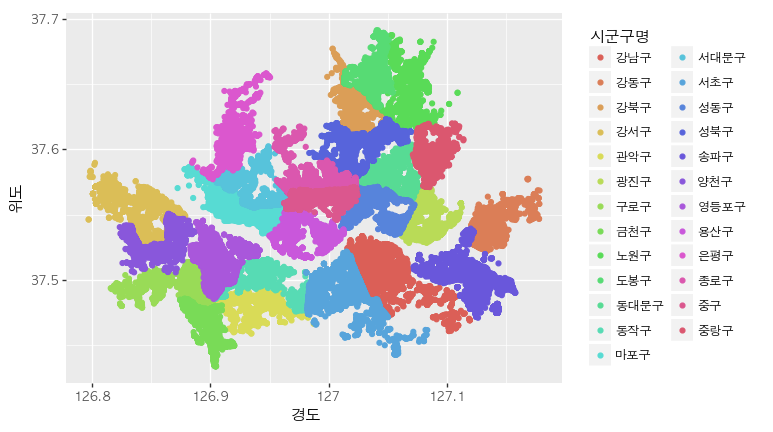

<ggplot: (7553666908)>

In [15]:
(ggplot(store_seoul)
 + aes(x='경도', y='위도', color='시군구명')
 + geom_point()
 + theme(text=element_text(family='AppleGothic'))
)

---
### 서울시 음식점 상권업종 비율

In [16]:
store_seoul_type = store_seoul['상권업종중분류명'].value_counts().reset_index()
store_seoul_type.columns = ('상권업종중분류명', '합계')
store_seoul_type

,상권업종중분류명,합계
0,한식,36523
1,커피점/카페,16281
2,유흥주점,14081
3,분식,11039
4,일식/수산물,7957
5,닭/오리요리,6052
6,양식,5590
7,패스트푸드,4799
8,제과제빵떡케익,4668
9,별식/퓨전요리,2765


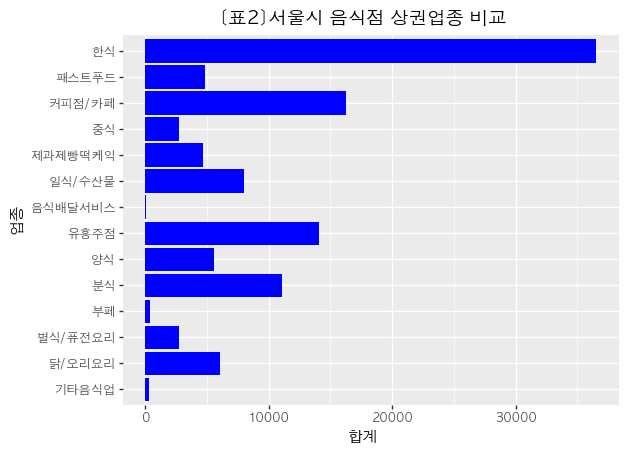

<ggplot: (7538526023)>

In [17]:
(ggplot(store_seoul_type)
 + ggtitle("[표2]서울시 음식점 상권업종 비교")
 + aes(x='상권업종중분류명', y='합계')
 + xlab("업종") + ylab("합계")
 + geom_bar(stat='identity', position='dodge', fill='blue')
 + coord_flip()
 + theme(text=element_text(family='AppleGothic'))
)